# 📊 Análisis exploratorio de datos en Retail


## 🗂️ Índice


1. [📌 Introducción](#1.-Introducción)
2. [⚙️ Carga de Librerías y Configuración Inicial](#2.-Carga-de-Librerías-y-Configuración-Inicial)
3. [📂 Carga del Dataset](#3.-Carga-del-Dataset)
4. [🔍 Exploración Inicial de los Datos](#4.-Exploración-Inicial-de-los-Datos)
5. [📈 Análisis Univariado](#5.-Análisis-Univariado)
6. [🔗 Análisis Bivariado y Multivariado](#6.-Análisis-Bivariado-y-Multivariado)
7. [💡 Análisis de Comportamiento de Compra y Recomendaciones](#7.-Análisis-de-Comportamiento-de-Compra-y-Recomendaciones)
8. [🧾 Conclusiones Finales](#8.-Conclusiones-Finales)
9. [📁 Anexos y Recursos](#9.-Anexos-y-Recursos)

## 1. Introducción

### English
This project aims to conduct an exploratory data analysis (EDA) using a synthetic dataset that simulates a realistic retail environment. The dataset includes sales transactions along with customer demographic information such as gender, age, and product category.

Through this analysis, the goal is to understand customer behavior and uncover key retail dynamics. The main objectives of this project are:

- 📌 Analyze how customer age and gender influence purchasing behavior.  
- 📌 Identify discernible patterns in sales over different time periods.  
- 📌 Determine which product categories are most appealing to customers.  
- 📌 Examine the relationship between age, spending, and product preferences.  
- 📌 Understand how shopping habits change with seasonal trends.  
- 📌 Explore distinct purchasing behaviors based on the number of items per transaction.  
- 📌 Investigate the distribution of product prices within each category and extract actionable insights.  

This analysis will generate visualizations and insights that help better understand customer behavior and support data-driven decisions in a retail context.

### Español
Este proyecto tiene como objetivo realizar un análisis exploratorio de datos (EDA) utilizando un dataset sintético que simula un entorno minorista realista. El dataset incluye transacciones de ventas junto con información demográfica de los clientes, como género, edad y categoría de producto.

A través de este análisis, se buscará comprender el comportamiento del cliente y las dinámicas clave del negocio retail. Los principales objetivos de este proyecto son:

- 📌 Analizar cómo influyen la edad y el género del cliente en su comportamiento de compra.  
- 📌 Identificar patrones de ventas a lo largo del tiempo.  
- 📌 Determinar qué categorías de productos tienen mayor atractivo entre los consumidores.  
- 📌 Estudiar la relación entre edad, gasto total y preferencias de productos.  
- 📌 Evaluar cómo varían los hábitos de compra en función de las temporadas.  
- 📌 Explorar si existen patrones de comportamiento según la cantidad de productos comprados por transacción.  
- 📌 Analizar la distribución de precios por categoría de producto y qué información se puede extraer de ello.  

Este análisis busca generar visualizaciones e insights que ayuden a comprender mejor el comportamiento de los clientes y a tomar decisiones más informadas en un entorno retail.

## 2. Carga de Librerías y Configuración Inicial

In [1]:
# Carga de librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Configuración para visualizar gráficos dentro del notebook
%matplotlib inline

print("Librerías cargadas correctamente ✅")

Librerías cargadas correctamente ✅


## 3. Carga del Dataset

In [2]:
# 3. Carga del Dataset

# Cargar el dataset desde un archivo CSV
df = pd.read_csv('retail_sales_dataset.csv')

# Verificar las primeras filas del dataset para asegurarnos que se cargó correctamente
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## 4. Exploración Inicial de los Datos

### Vista general del dataset

Antes de hacer cualquier análisis profundo, vamos a explorar la estructura general del dataset. Esto incluye revisar las primeras filas, conocer los tipos de datos, el número de filas y columnas, y detectar posibles valores faltantes.

In [3]:
# Dimensiones del dataset
print("Número de filas y columnas:")
print(df.shape)

# Primeras filas del dataset
print("\nPrimeras filas:")
display(df.head())

Número de filas y columnas:
(1000, 9)

Primeras filas:


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### Cambio de tipo de dato

Vemos que nuestra fecha no está en el tipo de dato correcto (datetime para trabajarlo en pandas), asi que debemos cambiarlo

In [5]:
# Convertimos la columna 'Date' a datetime
df['Date'] = pd.to_datetime(df['Date'])

# Verificamos el cambio
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [6]:
# Agregamos la columna 'Month' para el posterior análisis por meses
df['Month'] = df['Date'].dt.month_name()

df['Month']

0      November
1      February
2       January
3           May
4           May
         ...   
995         May
996    November
997     October
998    December
999       April
Name: Month, Length: 1000, dtype: object

In [7]:
# Estadísticas de columnas numéricas
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [8]:
# Valores nulos por columna
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Month               0
dtype: int64

In [9]:
# Verificamos si hay outliers (si existe algún caso donde el monto total sea mayor que el precio por unidad, lo cual no tiene sentido)
df = df[df['Total Amount'] >= df['Price per Unit']]
print(df.shape)

# No tenemos outliers en este caso

(1000, 10)


### Observaciones

A partir de esta revisión, podremos identificar:

- Si hay columnas con datos faltantes.
- Posibles errores de tipo de datos (por ejemplo, fechas que no están en formato date).
- Distribuciones extrañas u outliers que merecen una revisión más profunda.
- El contexto general de los datos (por ejemplo, tenemos datos de solo un año).

## 5. Análisis Univariado

### Análisis Univariado

El análisis univariado se enfoca en examinar las características de una sola variable a la vez. Este proceso nos ayuda a entender mejor su distribución, valores centrales, dispersión y cualquier posible anomalía o valor atípico.

En este análisis, exploraremos las variables numéricas y categóricas para obtener información relevante sobre el comportamiento de las ventas y los clientes.

### Variables Categóricas: Gender y Product Category

Comenzamos analizando las distribuciones de las variables categóricas **Gender** (género) y **Product Category** (categoría de producto).

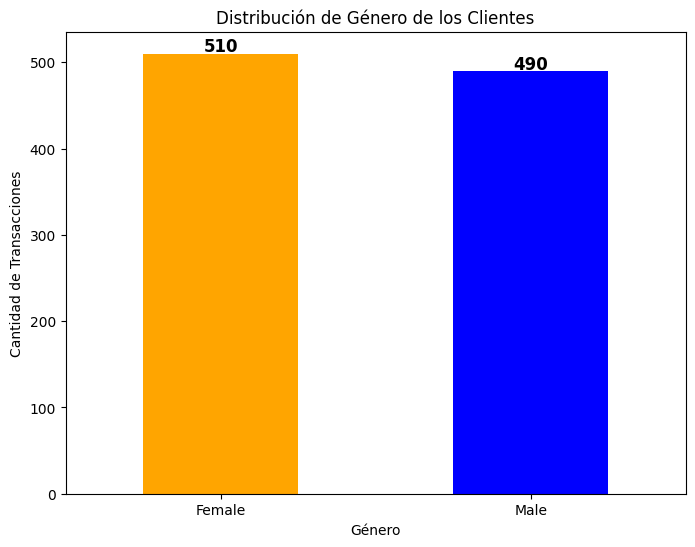

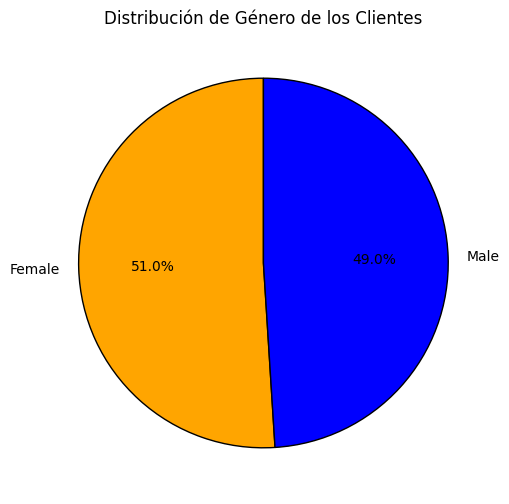

In [10]:
# Gráfico de barras para la variable 'Gender' con etiquetas de datos
plt.figure(figsize=(8, 6))
ax = df['Gender'].value_counts().plot(kind='bar', color=['orange', 'blue'])
plt.title('Distribución de Género de los Clientes')
plt.xlabel('Género')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=0)

# Agregar etiquetas de datos a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

# Gráfico circular para la distribución de género de los clientes
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'blue'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de Género de los Clientes')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()


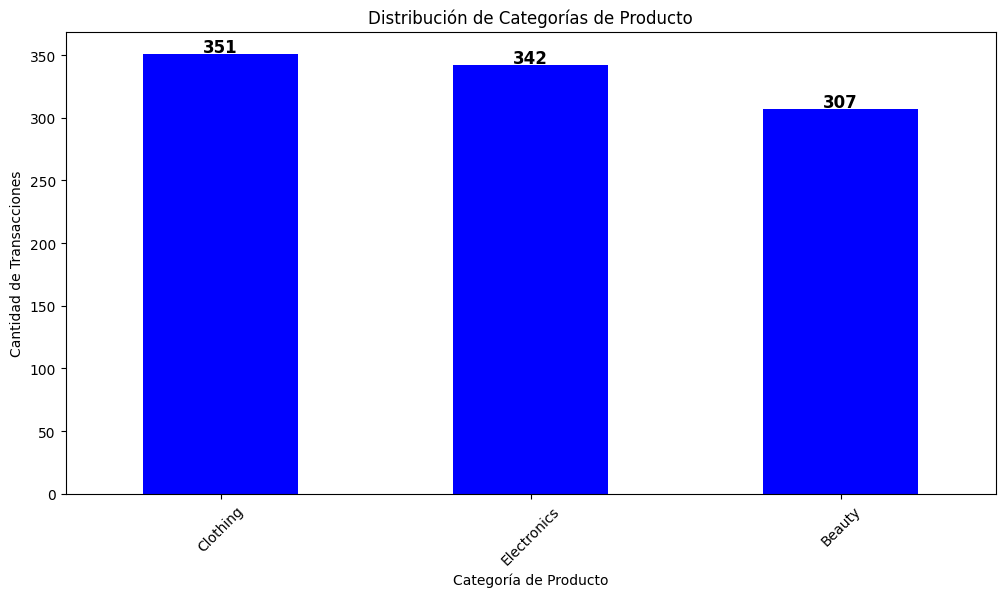

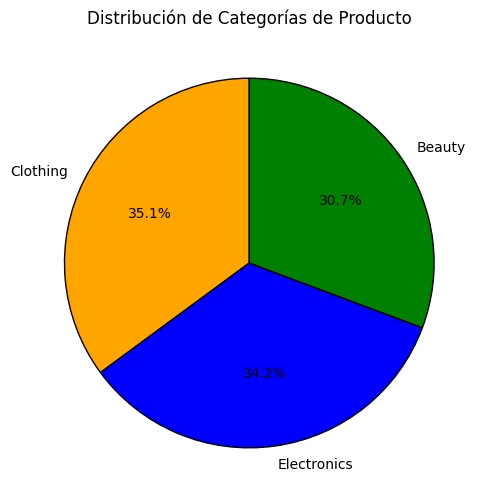

In [11]:
# Gráfico de barras para la variable 'Product Category' con etiquetas de datos
plt.figure(figsize=(12, 6))
ax = df['Product Category'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribución de Categorías de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=45)

# Agregar etiquetas de datos a cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

# Gráfico circular para la distribución de categorías de productos
plt.figure(figsize=(10, 6))
df['Product Category'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['orange', 'blue', 'green'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribución de Categorías de Producto')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()

### Variables Numéricas: Age, Quantity, Price per Unit, y Total Amount

Analizaremos las distribuciones de las variables numéricas utilizando histogramas y estadísticas descriptivas para identificar posibles patrones o valores atípicos.

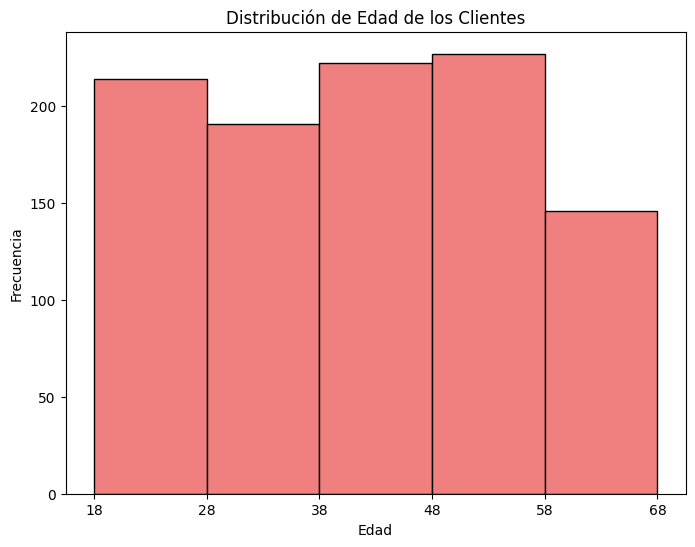

In [12]:
# Gráfico de histograma para la variable 'Age' 
plt.figure(figsize=(8, 6))

# Definir los bins (intervalos) para el histograma
age_bins = range(df['Age'].min(), df['Age'].max() + 10, 10)

# Crear el histograma
ax = df['Age'].plot(kind='hist', bins=age_bins, color='lightcoral', edgecolor='black')

# Establecer el título y etiquetas de los ejes
plt.title('Distribución de Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Ajustar las etiquetas del eje X para que muestren los intervalos de edad
plt.xticks(age_bins)

plt.show()


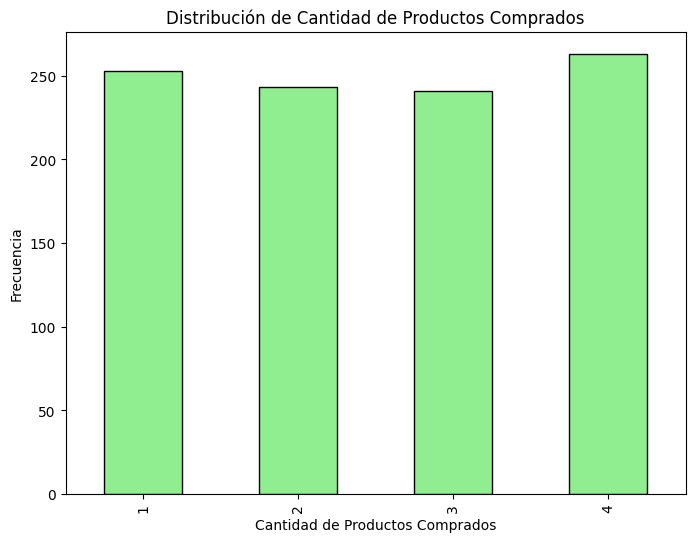

In [13]:
# Gráfico de barras para la distribución de la cantidad de productos comprados
plt.figure(figsize=(8, 6))

# Contamos las frecuencias de las diferentes cantidades de productos
df['Quantity'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')

# Establecer el título y las etiquetas de los ejes
plt.title('Distribución de Cantidad de Productos Comprados')
plt.xlabel('Cantidad de Productos Comprados')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

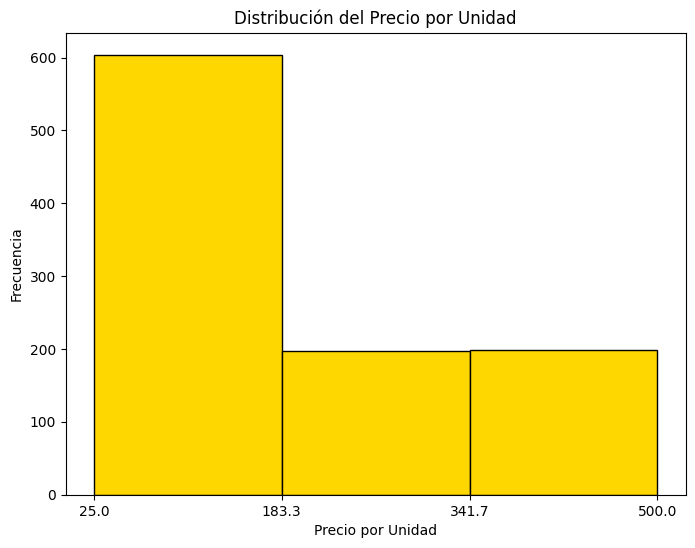

In [14]:
# Gráfico de histograma para la variable 'Price per Unit' con límites de las secciones
plt.figure(figsize=(8, 6))

# Definir los bins (intervalos) para el histograma
price_bins = np.linspace(df['Price per Unit'].min(), df['Price per Unit'].max(), 4)  # 3 bins

# Crear el histograma
ax = df['Price per Unit'].plot(kind='hist', bins=price_bins, color='gold', edgecolor='black')

# Establecer el título y etiquetas de los ejes
plt.title('Distribución del Precio por Unidad')
plt.xlabel('Precio por Unidad')
plt.ylabel('Frecuencia')

# Ajustar las etiquetas del eje X para que muestren los intervalos de precio
plt.xticks(price_bins)

plt.show()


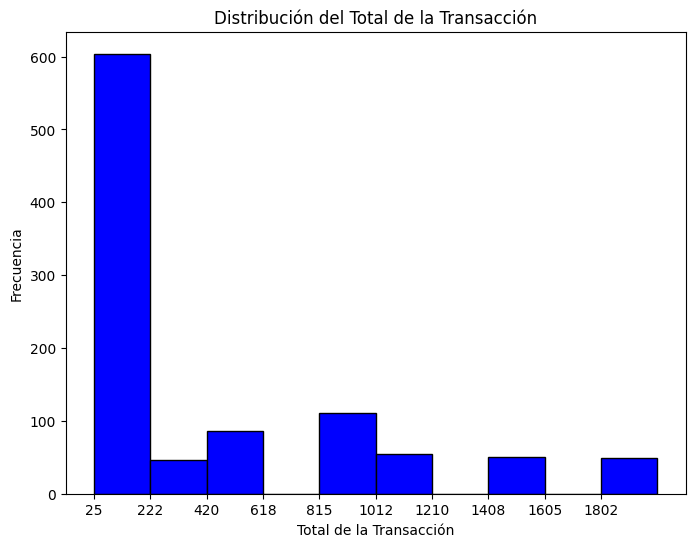

In [15]:
# Gráfico de histograma para la variable 'Total Amount'
plt.figure(figsize=(8, 6))
df['Total Amount'].plot(kind='hist', bins=10, color='blue', edgecolor='black')

# Establecer los límites del eje X según los intervalos de los bins
plt.xticks(np.arange(df['Total Amount'].min(), df['Total Amount'].max(), step=(df['Total Amount'].max()-df['Total Amount'].min())/10))

# Títulos y etiquetas
plt.title('Distribución del Total de la Transacción')
plt.xlabel('Total de la Transacción')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


## 6. Análisis Bivariado y Multivariado

### Correlación entre variables numéricas

Usaremos la matriz de correlación para darnos una idea de qué tan relacionadas están las variables numéricas.

                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


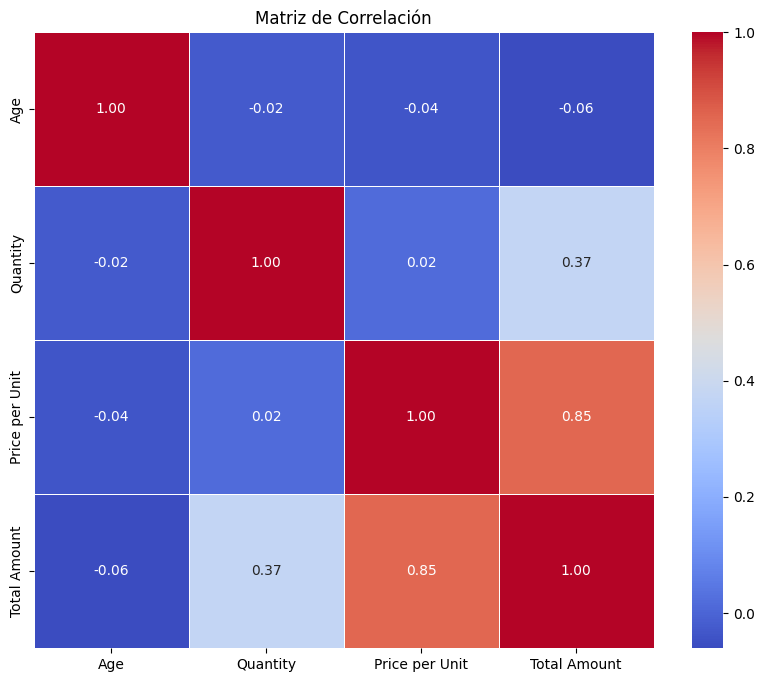

In [16]:
# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Transaction ID')

# Calcular la correlación entre las variables numéricas
correlation_matrix = df[numeric_cols].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Distribución de ventas a lo largo del año

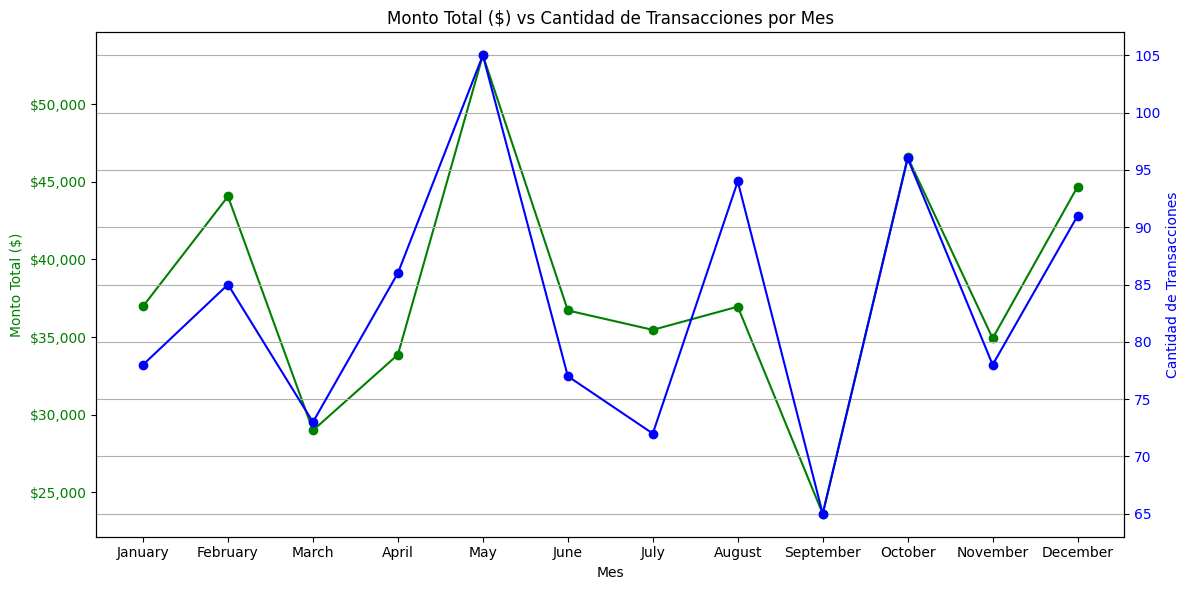

In [17]:
# Asegurar que los meses estén en orden correcto
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Agrupar datos por mes
monthly_data = df.groupby('Month').agg({
    'Transaction ID': 'count',
    'Total Amount': 'sum'
}).reindex(month_order)

# Crear figura y eje primario
fig, ax1 = plt.subplots(figsize=(12, 6))

# Línea para el monto total ($)
color1 = 'green'
ax1.set_xlabel('Mes')
ax1.set_ylabel('Monto Total ($)', color=color1)
ax1.plot(monthly_data.index, monthly_data['Total Amount'], color=color1, marker='o', label='Monto Total ($)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Crear eje secundario para cantidad de transacciones
ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Cantidad de Transacciones', color=color2)
ax2.plot(monthly_data.index, monthly_data['Transaction ID'], color=color2, marker='o', label='Cantidad de Transacciones')
ax2.tick_params(axis='y', labelcolor=color2)

# Título y ajustes
plt.title('Monto Total ($) vs Cantidad de Transacciones por Mes')
fig.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Distribución de ventas por Edad

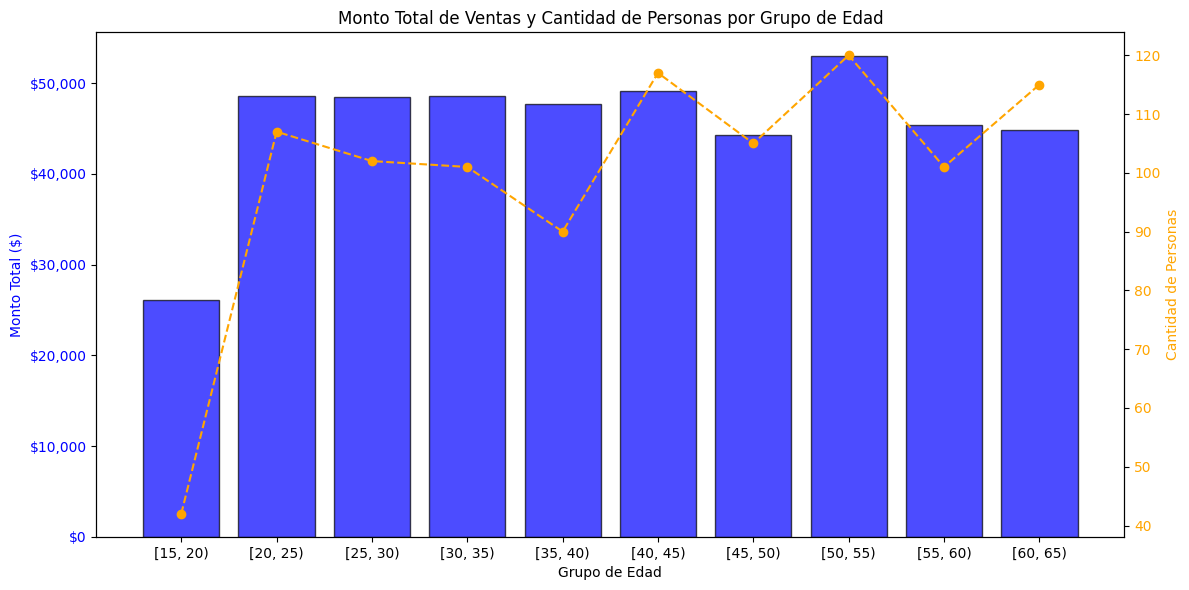

In [18]:
# Crear un nuevo rango de edad con intervalos de 5 años
df['Age Group'] = pd.cut(df['Age'], bins=np.arange(0, df['Age'].max() + 5, 5), right=False)

# Calcular monto total por grupo de edad
sales_by_age_group = df.groupby('Age Group', observed=True)['Total Amount'].sum()

# Contar la cantidad de personas únicas por grupo de edad
count_by_age_group = df.groupby('Age Group', observed=True)['Customer ID'].nunique()

# Convertir los índices a string para graficarlos
age_labels = sales_by_age_group.index.astype(str)

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primer gráfico: Monto total por grupo de edad
ax1.bar(age_labels, sales_by_age_group, color='blue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Grupo de Edad')
ax1.set_ylabel('Monto Total ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Segundo gráfico: Cantidad de personas por grupo de edad
ax2 = ax1.twinx()
ax2.plot(age_labels, count_by_age_group, color='orange', marker='o', linestyle='--', label='Cantidad de Personas')
ax2.set_ylabel('Cantidad de Personas', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Título y ajustes
plt.title('Monto Total de Ventas y Cantidad de Personas por Grupo de Edad')
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


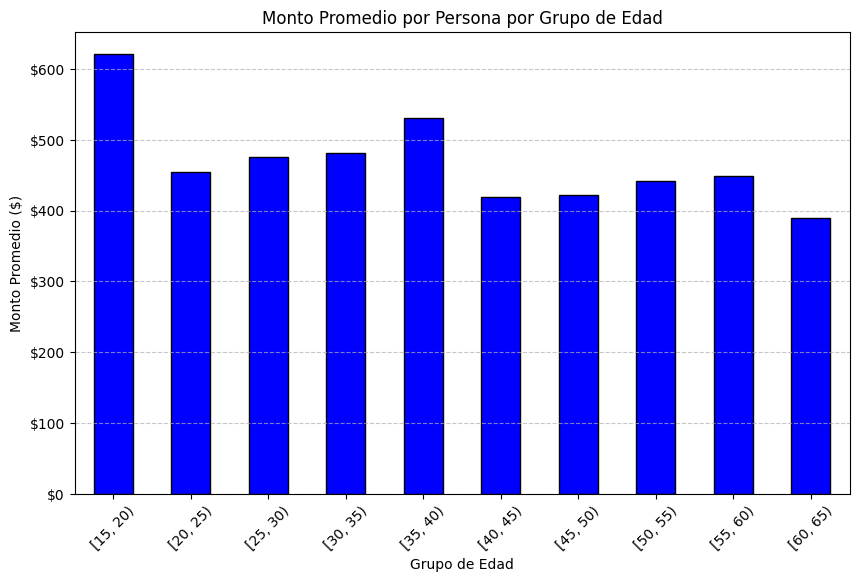

In [19]:
# Calcular el monto total por grupo de edad y la cantidad de personas
total_by_age_group = df.groupby('Age Group', observed=True)['Total Amount'].sum()
count_by_age_group = df.groupby('Age Group', observed=True)['Customer ID'].nunique()

# Calcular el monto promedio por persona por grupo de edad
avg_amount_per_person = total_by_age_group / count_by_age_group

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
avg_amount_per_person.plot(kind='bar', color='blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Monto Promedio por Persona por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Monto Promedio ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Formatear el eje Y para mostrar en formato de dólares
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Mostrar el gráfico
plt.show()


### Preferencia de Productos por Edad

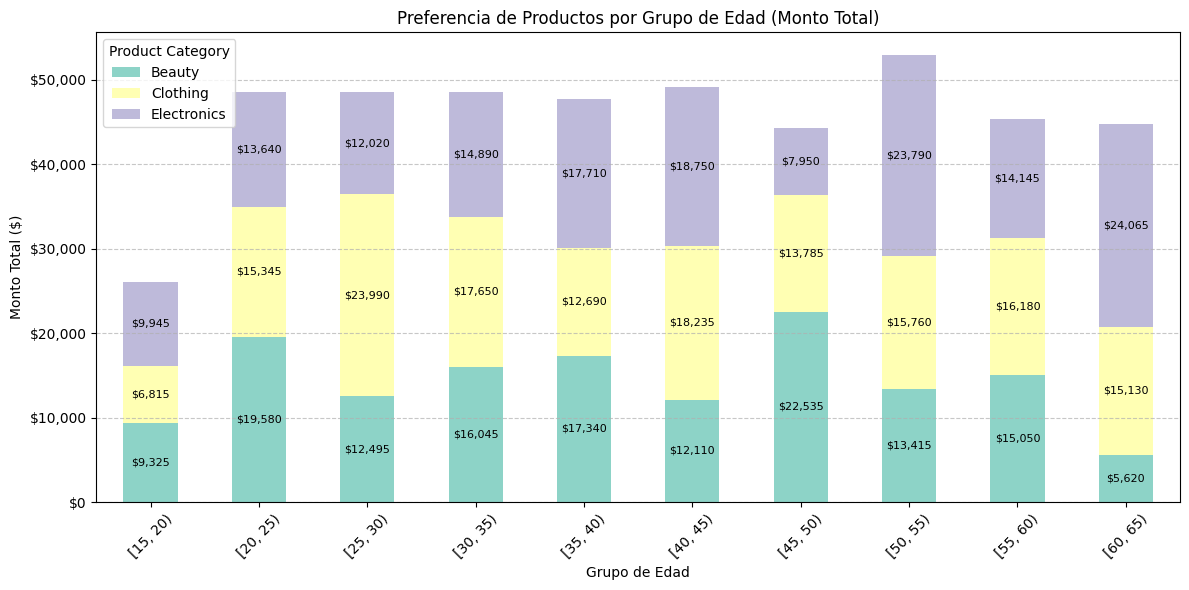

In [20]:
# Agrupar por grupo de edad y categoría de producto
sales_by_age_and_category = df.groupby(['Age Group', 'Product Category'], observed=True)['Total Amount'].sum().unstack()

# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 6))

# Colores por categoría
colors = plt.get_cmap('Set3').colors
bars = sales_by_age_and_category.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Personalización del gráfico
plt.title('Preferencia de Productos por Grupo de Edad (Monto Total)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Monto Total ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Añadir etiquetas de monto a cada segmento de barra
for bar_container in bars.containers:
    for bar in bar_container:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            ax.text(x, y, f"${height:,.0f}", ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

### Variación de compras según edad y género

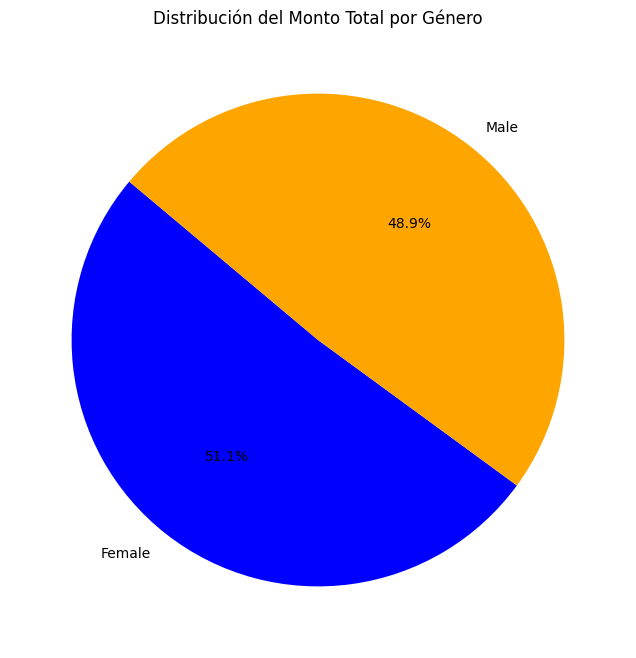

In [21]:
# Calcular el monto total por género
sales_by_gender = df.groupby('Gender')['Total Amount'].sum()

# Crear gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sales_by_gender, labels=sales_by_gender.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Distribución del Monto Total por Género')
plt.show()

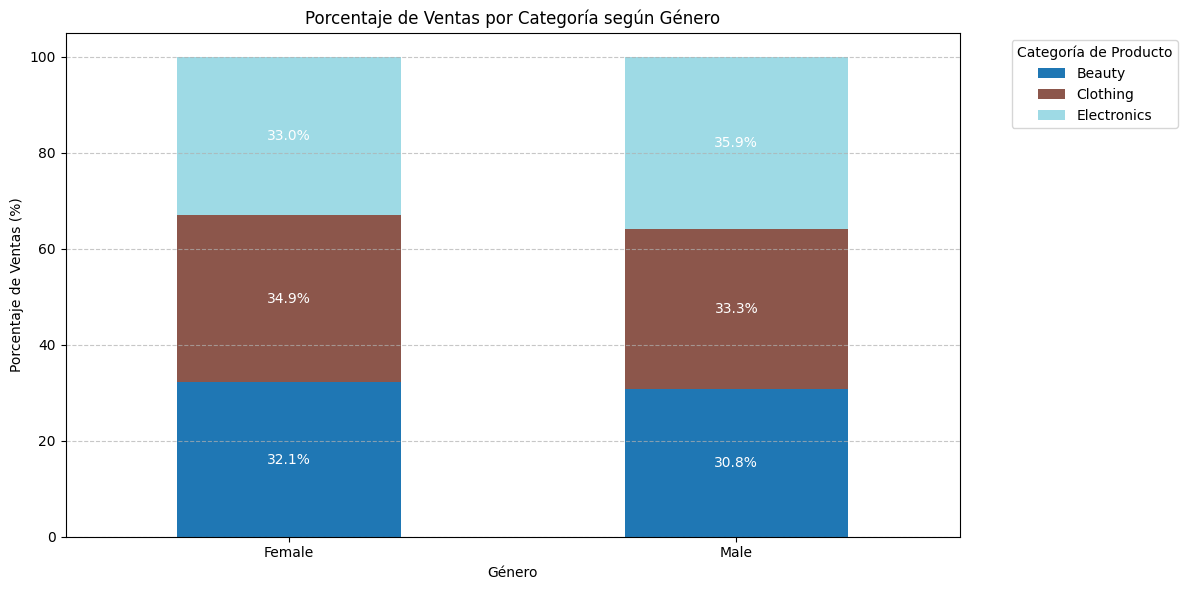

In [22]:
# Calcular el total de ventas por género y categoría de producto
sales_by_gender_category = df.groupby(['Gender', 'Product Category'])['Total Amount'].sum().unstack()

# Calcular el porcentaje de cada categoría en relación al total por género
sales_percentage = sales_by_gender_category.div(sales_by_gender_category.sum(axis=1), axis=0) * 100

# Crear gráfico de barras apiladas con porcentaje
ax = sales_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Personalizar gráfico
plt.title('Porcentaje de Ventas por Categoría según Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Ventas (%)')
plt.xticks(rotation=0)
plt.legend(title='Categoría de Producto', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar porcentaje en cada barra
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Solo mostrar si hay valor
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.),
                    ha='center', va='center', color='white', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



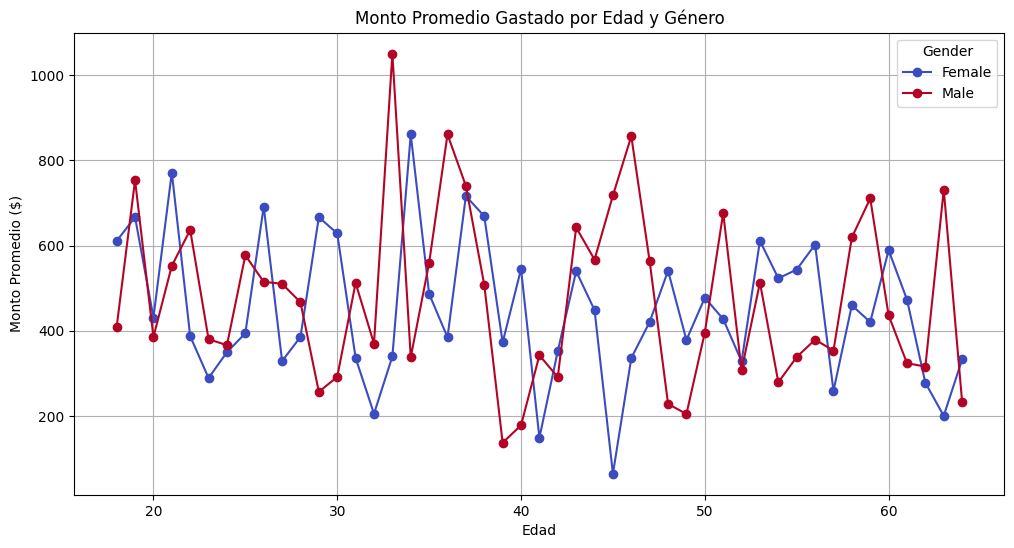

In [23]:
avg_spend = df.groupby(['Age', 'Gender'])['Total Amount'].mean().unstack()

avg_spend.plot(kind='line', figsize=(12, 6), marker='o', colormap='coolwarm')
plt.title('Monto Promedio Gastado por Edad y Género')
plt.xlabel('Edad')
plt.ylabel('Monto Promedio ($)')
plt.grid(True)
plt.show()

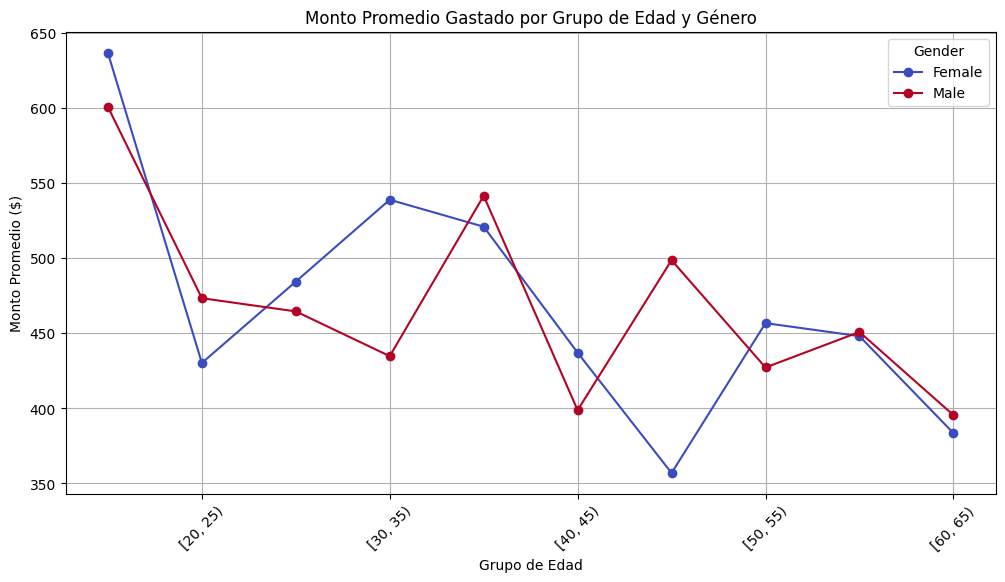

In [24]:
# Calcular el gasto promedio por grupo de edad y género
avg_spend = df.groupby(['Age Group', 'Gender'], observed=False)['Total Amount'].mean().unstack()

# Graficar el gasto promedio
avg_spend.plot(kind='line', figsize=(12, 6), marker='o', colormap='coolwarm')
plt.title('Monto Promedio Gastado por Grupo de Edad y Género')
plt.xlabel('Grupo de Edad')
plt.ylabel('Monto Promedio ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Ventas por día de semana

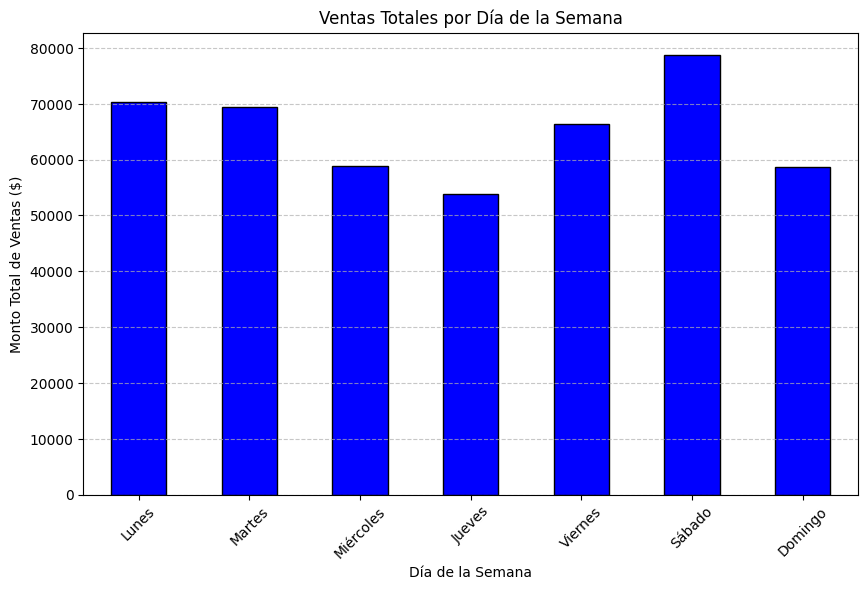

In [25]:
# Agregamos el día de la semana para un análisis más completo de las ventas en el tiempo
df['Day of Week'] = df['Date'].dt.dayofweek

# Calcular el total de ventas por día de la semana
sales_by_day = df.groupby('Day of Week')['Total Amount'].sum()

# Graficar las ventas por día de la semana
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='blue', edgecolor='black')

# Personalizar el gráfico
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Monto Total de Ventas ($)')
plt.xticks(ticks=np.arange(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

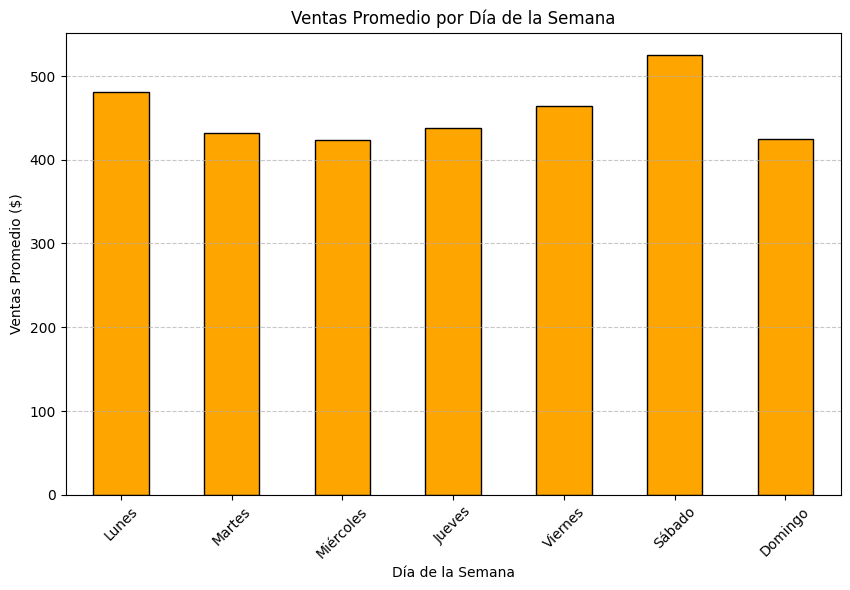

In [26]:
# Calcular las ventas promedio por día de la semana
avg_sales_by_day = df.groupby('Day of Week')['Total Amount'].mean()

# Graficar las ventas promedio por día de la semana
plt.figure(figsize=(10, 6))
avg_sales_by_day.plot(kind='bar', color='orange', edgecolor='black')

# Personalizar el gráfico
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio ($)')
plt.xticks(ticks=np.arange(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Ventas por Categoría de Producto

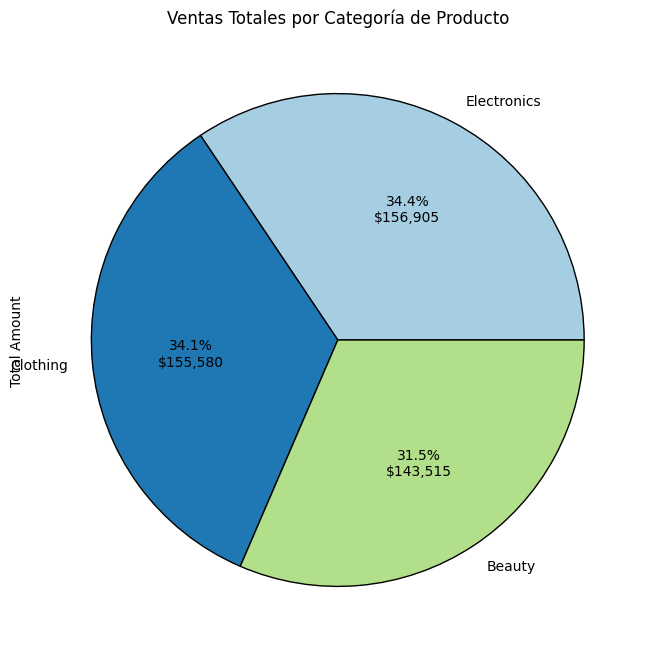

In [27]:
# Agrupar las ventas totales por categoría de producto
sales_by_category = df.groupby('Product Category')['Total Amount'].sum()

# Ordenar las categorías por ventas totales de mayor a menor
sales_by_category = sales_by_category.sort_values(ascending=False)

# Crear el gráfico circular (pastel)
plt.figure(figsize=(8, 8))
ax = sales_by_category.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n${p * sales_by_category.sum() / 100:,.0f}', 
                            colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})

# Personalizar el gráfico
plt.title('Ventas Totales por Categoría de Producto')

# Mostrar el gráfico
plt.show()

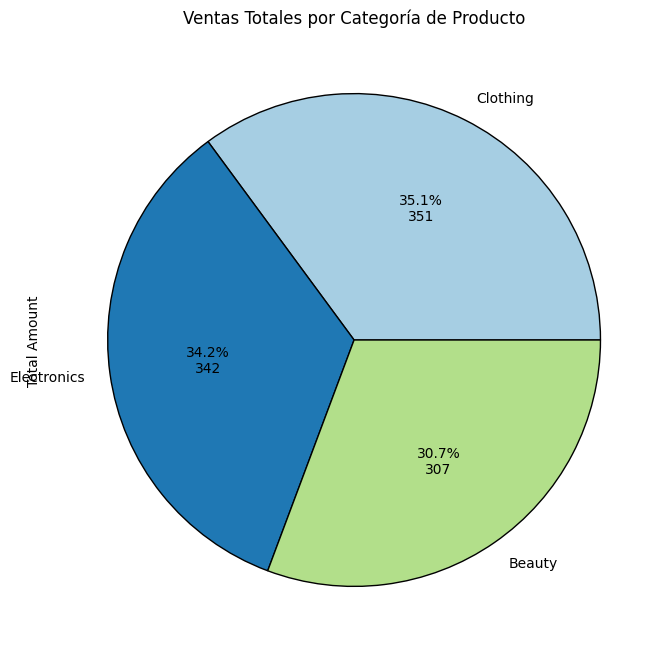

In [28]:
# Agrupar las ventas totales por categoría de producto
sales_by_category = df.groupby('Product Category')['Total Amount'].count()

# Ordenar las categorías por ventas totales de mayor a menor
sales_by_category = sales_by_category.sort_values(ascending=False)

# Crear el gráfico circular (pastel)
plt.figure(figsize=(8, 8))
ax = sales_by_category.plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n{p * sales_by_category.sum() / 100:,.0f}', 
                            colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})

# Personalizar el gráfico
plt.title('Ventas Totales por Categoría de Producto')

# Mostrar el gráfico
plt.show()

### Relaciones entre edad, gastos y preferencias de productos

In [29]:
# Crear intervalos de edad de 5 años
bins = range(0, 101, 5)  # Edad de 0 a 100, con intervalos de 5 años
labels = [f"{i}-{i+4}" for i in range(0, 100, 5)]  # Etiquetas para los intervalos
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Ver los primeros registros para asegurarnos de que se ha creado correctamente
df[['Age', 'Age Group']].head()

,Age,Age Group
0,34,30-34
1,26,25-29
2,50,50-54
3,37,35-39
4,30,30-34


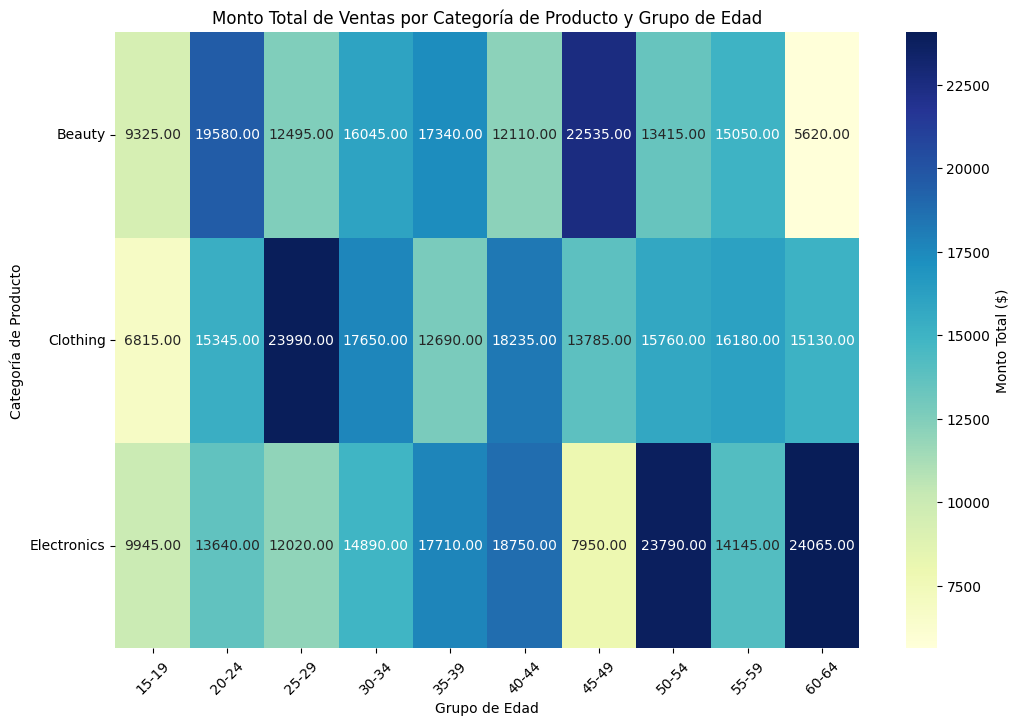

In [30]:
# Agrupar por categoría de producto y grupo de edad, luego calcular el monto total de ventas
sales_by_category_age = df.groupby(['Product Category', 'Age Group'], observed=True)['Total Amount'].sum().unstack()

# Ver las primeras filas para confirmar los datos
sales_by_category_age.head()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_category_age, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Monto Total ($)'})

# Personalizar el gráfico
plt.title('Monto Total de Ventas por Categoría de Producto y Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Categoría de Producto')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

### Ventas por Estación

In [31]:
# Crear un diccionario para mapear el mes a la estación
month_to_season = {
    'January': 'Winter', 'February': 'Winter', 'December': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall'
}

# Crear la nueva columna 'Season' en función del mes
df['Season'] = df['Month'].map(month_to_season)

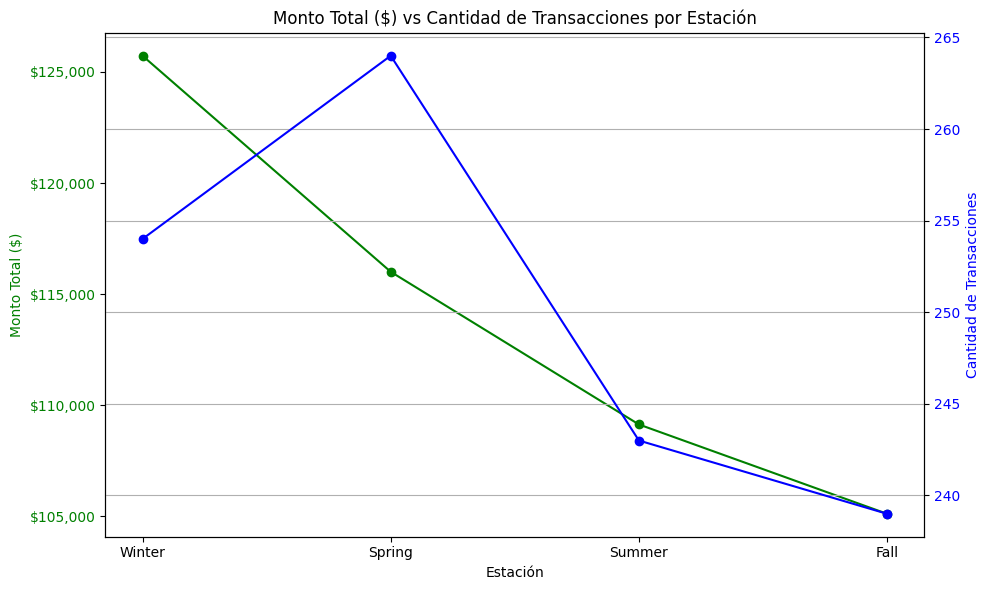

In [32]:
# Orden correcto de estaciones
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Agrupar datos por estación
seasonal_data = df.groupby('Season').agg({
    'Transaction ID': 'count',
    'Total Amount': 'sum'
}).reindex(season_order)

# Crear figura y eje primario
fig, ax1 = plt.subplots(figsize=(10, 6))

# Línea para el monto total ($)
color1 = 'green'
ax1.set_xlabel('Estación')
ax1.set_ylabel('Monto Total ($)', color=color1)
ax1.plot(seasonal_data.index, seasonal_data['Total Amount'], color=color1, marker='o', label='Monto Total ($)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Crear eje secundario para cantidad de transacciones
ax2 = ax1.twinx()
color2 = 'blue'
ax2.set_ylabel('Cantidad de Transacciones', color=color2)
ax2.plot(seasonal_data.index, seasonal_data['Transaction ID'], color=color2, marker='o', label='Cantidad de Transacciones')
ax2.tick_params(axis='y', labelcolor=color2)

# Título y ajustes
plt.title('Monto Total ($) vs Cantidad de Transacciones por Estación')
fig.tight_layout()
plt.grid(True)
plt.show()

### Montos totales por cantidad de objetos cada transacción

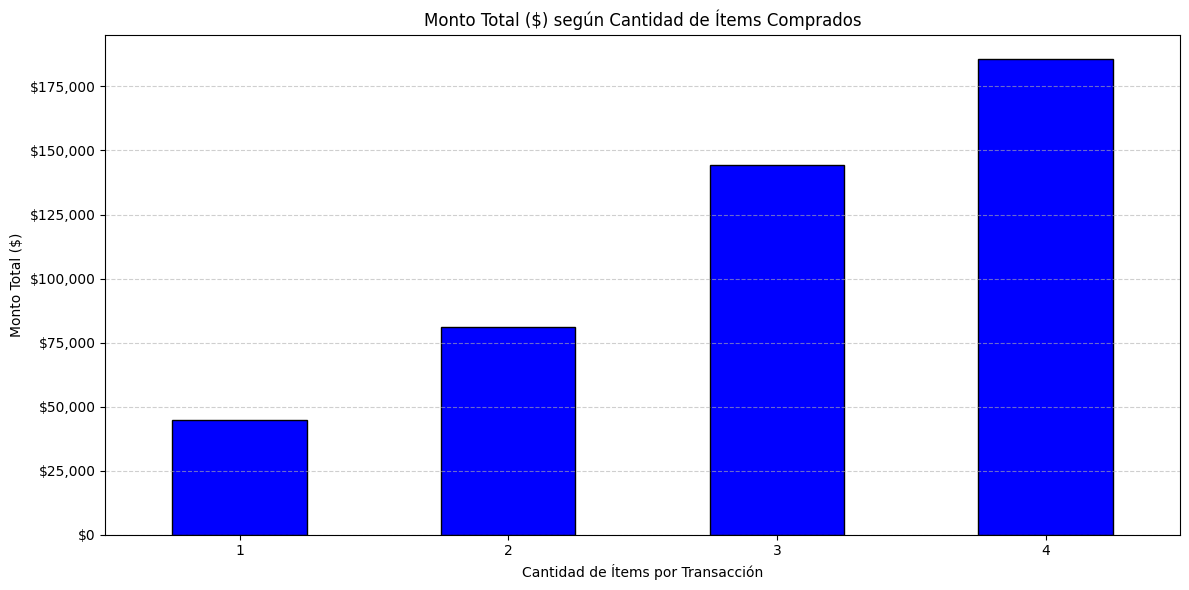

In [33]:
# Agrupar por cantidad de ítems y sumar el monto total gastado
spend_by_quantity = df.groupby('Quantity')['Total Amount'].sum().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
spend_by_quantity.plot(kind='bar', color='blue', edgecolor='black')

# Personalizar gráfico
plt.title('Monto Total ($) según Cantidad de Ítems Comprados')
plt.xlabel('Cantidad de Ítems por Transacción')
plt.ylabel('Monto Total ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.0f}"))
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

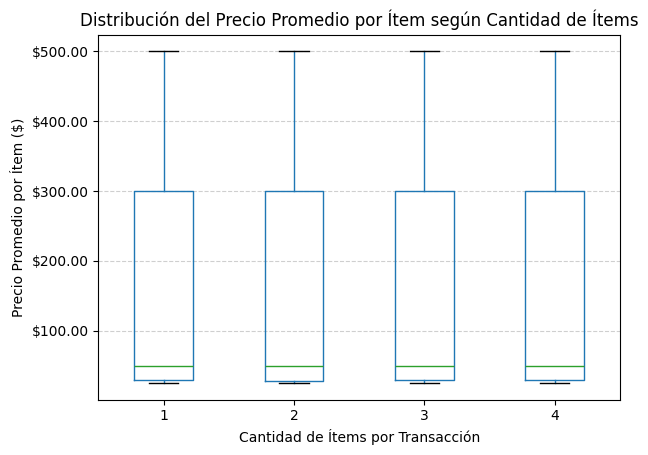

In [34]:
# Crear columna del precio promedio por ítem si no existe
df['Avg Item Price'] = df['Total Amount'] / df['Quantity']

# Filtrar para evitar extremos si quieres una vista más clara (opcional)
# df = df[df['Quantity'] <= 10]  # Por ejemplo, hasta 10 ítems

# Crear el boxplot
plt.figure(figsize=(12, 6))
df.boxplot(column='Avg Item Price', by='Quantity', grid=False)

# Estética
plt.title('Distribución del Precio Promedio por Ítem según Cantidad de Ítems')
plt.suptitle('')  # Quita el título automático de pandas
plt.xlabel('Cantidad de Ítems por Transacción')
plt.ylabel('Precio Promedio por Ítem ($)')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"${x:,.2f}"))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Distribución de precios por categoría

<Figure size 1400x600 with 0 Axes>

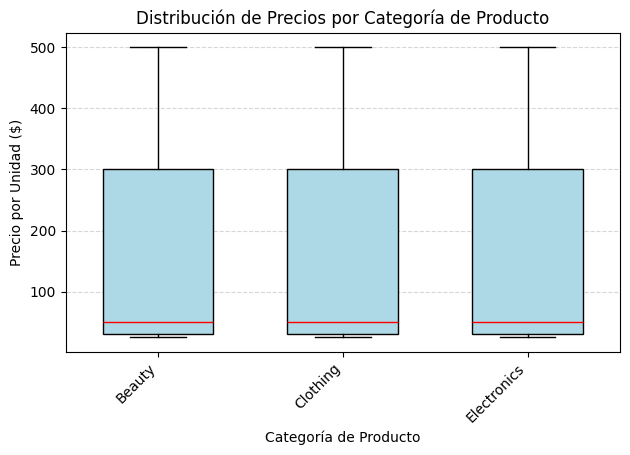

In [35]:
# Ordenar categorías por mediana del precio para mejor visualización
median_prices = df.groupby('Product Category')['Price per Unit'].median().sort_values()
sorted_categories = median_prices.index

# Crear boxplot
plt.figure(figsize=(14, 6))
df.boxplot(column='Price per Unit', by='Product Category', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(markerfacecolor='orange', marker='o', markersize=5, linestyle='none'),
           widths=0.6)

# Personalizar
plt.title('Distribución de Precios por Categoría de Producto')
plt.suptitle('')  # Quitar título automático de pandas
plt.xlabel('Categoría de Producto')
plt.ylabel('Precio por Unidad ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 7. Análisis de Comportamiento de Compra y Recomendaciones

### 1. **Influencia de la Edad y el Género en el Comportamiento de Compra**
   - **Hallazgos:** 
     - Podemos ver cómo los diferentes grupos de edad gastan montos similares en total, excepto por el de los menores de edad (15-19). Sin embargo, esto se debe a que forman un grupo más pequeño; en realidad, en promedio es el grupo que gasta más por persona.
     - Hay una proporción similar entre mujeres y hombres. De igual forma, sus montos de gasto total están cercanos.
     - Los hombres invierten más dinero en electrónicos, seguidos por ropa y luego productos de belleza. Por su parte, las mujeres gastan principalmente en ropa, seguidos por electrónicos y productos de belleza.
     - Los jóvenes de 25 a 29 años prefieren gastar en ropa. Los productos de belleza son preferidos por el público entre 45 y 49 años, mientras que los electrónicos son más atractivos para el grupo de 60 a 64 años.
   - **Recomendaciones:**
       - Diseñar campañas de marketing por grupo etario: enfocar promociones de ropa hacia personas jóvenes (25-29), productos de belleza hacia clientes de mediana edad (45-49) y electrónicos hacia adultos mayores (60-64).
       - Personalizar las campañas según género: promocionar ropa y productos de belleza con mayor intensidad hacia mujeres, y destacar electrónicos en campañas dirigidas a hombres.
       - Considerar el alto gasto promedio del grupo de 15-19 años al diseñar estrategias específicas para captar a este segmento, que aunque pequeño, demuestra alta disposición de gasto.

### 2. **Patrones de Ventas a lo Largo del Tiempo**
   - **Hallazgos:**
     - Mayo fue el mes donde hubo más ingreso, setiembre fue donde estuvo el menor. Los sábados son los días donde más se compra, opuesto a los jueves que son donde menos se compra.
     - Podemos ver una relación en la cantidad de transacciónes y los montos.
     - Observamos también que la estación con más ingresos es el invierno, seguido de la primavera, el verano y el otoño.
   - **Recomendaciones:**
       - Diseñar campañas promocionales y de marketing para capitalizar los picos de ventas en invierno y primavera, por ejemplo, con lanzamientos de productos, ofertas especiales o bundles durante esos períodos.
       - Implementar estrategias para incentivar el consumo en meses y días de baja venta como septiembre o los jueves. Esto puede incluir descuentos flash, cupones por fidelidad o eventos exclusivos esos días.
       - Planificar adecuadamente el inventario y la logística para que coincidan con los ciclos de mayor demanda, evitando quiebres de stock en los meses y estaciones más fuertes.
       - Usar los datos históricos de ventas por mes y día para ajustar la asignación de personal y recursos en tiendas o plataformas online, mejorando la experiencia del cliente durante los períodos de mayor actividad.

### 3. **Categorías de Productos con Mayor Atractivo**
   - **Hallazgos:**
     - Los productos electrónicos son los que mayores ventas tienen, seguidos de la ropa y por último los de belleza.
     - Sin embargo, en términos de cantidad de productos vendidos, la categoría más popular es la ropa, mientras que los productos de belleza son los menos frecuentes.
   - **Recomendaciones:**
     -  Focalizar campañas promocionales en los productos electrónicos durante temporadas clave (como invierno o fines de semana), aprovechando su alto valor por transacción.
     -  Incentivar la compra de productos de belleza mediante combos, descuentos por volumen o promociones cruzadas con otras categorías más fuertes, como ropa.
     -  Ajustar el inventario de forma estratégica, asegurando suficiente stock de ropa para satisfacer la alta demanda en unidades, y mantener niveles adecuados de electrónicos para optimizar ingresos.
     -  Evaluar la posibilidad de introducir nuevos productos o subcategorías en belleza que puedan aumentar su atractivo y rotación.

### 4. **Relación entre Edad, Gasto Total y Preferencias de Productos**
   - **Hallazgos:**
     - Podemos ver en nuestro mapa de calor como el público de entre 25 a 29 son los que mas ventas tienen para la categoría de ropa.
     - Para la categoría de belleza, es el público de entre 45 a 49 que más destaca.
     - Los productos electrónicos tienen mayor cantidad de ventas para público mayor a 50 años, en especial los grupos de 50 a 54 y 60 a 64.
   - **Recomendaciones:**
       - Diseñar estrategias de marketing segmentadas por edad, resaltando los productos más atractivos para cada grupo etario.
       - Ofrecer campañas específicas: por ejemplo, descuentos en ropa orientados a jóvenes adultos o bundles de tecnología para adultos mayores.
       - Evaluar la posibilidad de adaptar el surtido de productos por grupo de edad en tiendas físicas o en línea, optimizando el catálogo para cada segmento.
       - Ajustar la política de precios para cada categoría y grupo etario, considerando la disposición al gasto y el tipo de producto preferido.
### 5. **Variación de los Hábitos de Compra Según las Estaciones**
   - **Hallazgos:**
     -  Aunque el invierno fue la estación con mayores ingresos en ventas, la primavera presentó la mayor cantidad de transacciones realizadas. Esto indica que, si bien en invierno se generan compras de mayor valor, en primavera se realizan más compras en términos de volumen..
   - **Recomendaciones:**
     - Ajustar el mix de productos ofrecidos por estación: priorizar artículos de mayor valor durante el invierno y una mayor variedad o promociones en primavera para capitalizar el volumen de compras.
     - Implementar campañas de marketing estacionales enfocadas en las características de cada estación:
     - En invierno, destacar promociones premium, bundles o descuentos en productos costosos.
     - En primavera, incentivar la frecuencia de compra con ofertas múltiples, descuentos por volumen o programas de fidelidad.
     - Analizar inventarios con base en la estacionalidad para evitar quiebres de stock en temporadas de alta transacción y sobrestock en temporadas de menor movimiento.
### 6. **Patrones de Comportamiento Según la Cantidad de Productos Comprados**
   - **Hallazgos:**
     - El análisis de los montos por cantidad de productos comprados muestra un patrón lineal: a mayor cantidad de productos en una transacción, mayor es el monto total de la compra.
     - Sin embargo, los gráficos de distribución (boxplots) revelan que el comportamiento del precio por unidad es casi idéntico en todas las cantidades (1 a 4 productos), presentando la misma moda y distribución general.
     - Esto sugiere que los clientes que compran más no están eligiendo productos más económicos, sino simplemente comprando más unidades con un patrón de precios muy similar.
   - **Recomendaciones:**
     - Incentivar la compra de múltiples productos mediante estrategias como descuentos por volumen o promociones del tipo "compra 3 y lleva 1 gratis", ya que el monto total aumenta proporcionalmente con la cantidad comprada.
     - Diseñar bundles o paquetes atractivos de productos complementarios, sin necesidad de reducir mucho el precio por unidad, dado que no se observa una preferencia por productos más baratos en compras grandes.
     - Ofrecer recomendaciones de productos adicionales al momento de la compra (upselling y cross-selling), sabiendo que los clientes mantienen un patrón estable de gasto por unidad.

### 7. **Distribución de Precios por Categoría de Producto**
   - **Hallazgos:**
     - Al analizar la distribución de precios por categoría mediante gráficos de boxplot, se observa que las tres categorías (Electrónica, Ropa y Belleza) presentan una distribución muy similar.
     - Las medianas, rangos intercuartílicos y valores atípicos no varían significativamente entre categorías, lo cual sugiere que los precios están distribuidos de forma bastante uniforme sin diferencias marcadas entre los tipos de productos.
   - **Recomendaciones:**
     -  Evaluar si los precios actuales por categoría realmente reflejan la percepción de valor por parte del cliente. Si todas las categorías tienen precios similares, pero el valor percibido difiere, puede ser útil ajustar los precios o la estrategia de comunicación.
     -  Considerar una diferenciación más clara en precios para destacar productos premium o económicos dentro de cada categoría, si se desea segmentar a distintos tipos de consumidores.
     -  Revisar si hay oportunidad de mejorar el margen de ganancia ajustando precios de productos con baja elasticidad de demanda en cada categoría.

## 8. Conclusiones Finales

Este análisis exploratorio del dataset de ventas minoristas permitió obtener información valiosa sobre el comportamiento de compra de los clientes en función de características demográficas, temporales y de producto. A lo largo del estudio, se abordaron diversas preguntas de negocio que ayudaron a identificar patrones clave y oportunidades de mejora.

### Metodología y Herramientas Utilizadas
- **Lenguaje de programación:** Python.
- **Librerías utilizadas:** pandas, matplotlib, seaborn, numpy.
- **Técnicas aplicadas:** limpieza y transformación de datos, agrupamiento, visualización de datos, análisis de tendencias y patrones.
- **Tipo de gráficos:** gráficos de barras, líneas, circulares, mapas de calor y boxplots, utilizados para facilitar la interpretación visual de los resultados.

### Principales Hallazgos
- Existen diferencias claras en las preferencias de productos y hábitos de compra según **edad y género**.
- Se observaron **patrones estacionales** marcados, con un mayor volumen de ingresos en invierno, aunque la mayor cantidad de tickets se generó en primavera.
- Las **categorías de productos** tienen comportamientos distintos en términos de volumen y valor: Electrónica lidera en ingresos, mientras que Ropa domina en cantidad.
- El análisis reveló que a mayor cantidad de productos por ticket, mayor es el monto gastado, pero **el precio promedio por producto se mantiene constante**, lo que indica una estructura de precios homogénea.
- Las **distribuciones de precios por categoría** fueron similares, lo cual sugiere una política de precios uniforme entre categorías.

### Impacto del Análisis
Gracias a este análisis se respondieron preguntas clave del negocio relacionadas con:
- Segmentación de clientes.
- Temporadas de alta y baja venta.
- Optimización de promociones y stock por categoría y perfil de consumidor.
- Oportunidades para campañas de marketing segmentadas.

**Este tipo de análisis puede ser la base para modelos más avanzados de predicción o recomendaciones personalizadas, además de aportar valor directo en la toma de decisiones comerciales estratégicas.**

## 9. Anexos y Recursos

### Fuente de Datos
- Dataset utilizado: [Retail Sales Dataset - Kaggle](https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset/data)

### Herramientas Utilizadas
- **Python** para análisis de datos y visualización.
- **Librerías principales:**
  - `pandas`: para manipulación y análisis de datos tabulares.
  - `matplotlib` y `seaborn`: para visualización de datos.
  - `numpy`: para cálculos numéricos y agrupaciones.

### Notas Complementarias
- El dataset ya se encontraba limpio, sin embargo, se realizaron transformaciones adicionales para facilitar el análisis y responder a preguntas clave del negocio.
- Algunas de estas transformaciones incluyen: 
  - Creación de la variable `Total Amount` (precio por cantidad).
  - Agrupación de edades en `Age Group`.
  - Categorización temporal como mes, día de la semana y estación del año.
- Todas las visualizaciones fueron generadas desde notebooks de Python en un entorno local con Jupyter Notebooks.


### Proyectos Relacionados
- A partir del mismo dataset trabajado, se construyó también un **dashboard interactivo en Power BI** como parte de un proyecto complementario para el portafolio, orientado a facilitar la exploración de los hallazgos clave de manera visual e intuitiva.

### Recomendaciones Técnicas Futuras
- Ampliar el análisis incluyendo modelos de segmentación de clientes con técnicas como **clustering**.
- Desarrollar modelos predictivos para anticipar el comportamiento de compra según temporada, edad o categoría.
- Integrar múltiples fuentes de datos como redes sociales o inventario para enriquecer el análisis.